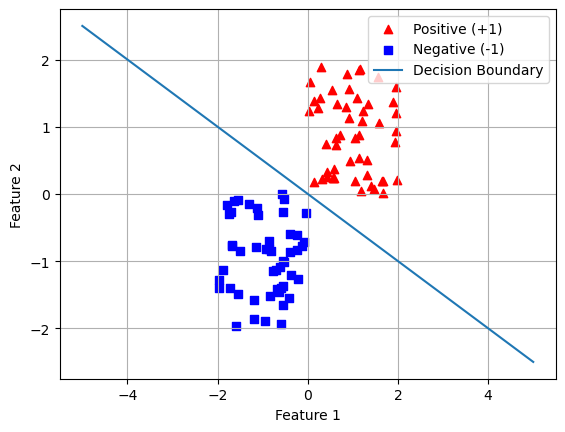

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_separable_data(dim, points, bias, slope):
    """
    生成线性可分数据集

    参数:
    dim -- 数据点的维度
    points -- 每个类别的数据点数量
    bias -- 线性分界线的偏置项（截距）
    slope -- 线性分界线的斜率

    返回值:
    X -- 数据点矩阵
    y -- 数据点标签
    """
    # 生成随机数据点
    np.random.seed(0)
    X1 = np.random.uniform(low=-1,high=1,size=(points,dim)) + [1, 1]  # 第一类数据点
    X2 = np.random.uniform(low=-1,high=1,size=(points,dim)) - [1, 1]  # 第二类数据点
    X = np.vstack((X1, X2))
    
    # 生成标签
    y1 = np.ones(points)
    y2 = -np.ones(points)
    y = np.hstack((y1, y2))
    
    # 可视化数据（可选）
    plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='^', label='Positive (+1)')
    plt.scatter(X2[:, 0], X2[:, 1], color='blue', marker='s', label='Negative (-1)')
    
    # 绘制分界线
    x_values = np.linspace(-5, 5, 100)
    y_values = slope * x_values + bias
    plt.plot(x_values, y_values, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return X, y

# 使用函数生成数据
dim = 2
points = 50
bias = 0
slope = -0.5
X, y = generate_linear_separable_data(dim, points, bias, slope)


$$
\mathbb{w}=\sum_{i=1}^{N}n_i\eta y_ix_i \\
b=\sum_{i=1}^{N}n_i\eta y_i  \\
f(x)=sign(\sum_{j=1}^{N}n_j \eta y_jx_j\cdot x+\sum_{j=1}^{N}n_j\eta y_j)
$$  
更新参数的形式为:
$$
n_j \gets n_j + 1
$$
其中$j$表示当前模型分类出错的点。与原始形式相比，我们可以创建一个$N\times N$的$Gram$矩阵来存储所有点之间的内积。
$$
G=[x_i\cdot x_j]_{N\times N}
$$
每次计算$\sum_{j=1}^{N}n_j \eta y_jx_j\cdot x$部分仅需查表求和即可，省去内积计算操作。

In [35]:
# 计算Gram矩阵
G = np.dot(X, X.T)

flag = True # 分类完成的标志
lr = 0.1 # 学习率
nums = X.shape[0] # 全部的数据点
n = np.zeros(nums) # 表示n_j的向量

def f(num_i):
    res = lr*np.sum(n*y*G[:][num_i])+lr*np.sum(n*y)
    if res*y[num_i]<=0:
        n[num_i]+=1
        return False #更新参数
    else: 
        return True


while flag:
    for i in range(nums):
        if not f(i): #若更新参数则从头遍历所有数据点
            break
        if i == nums-1: #若遍历完所有点没有更新参数，则已经找到划分超平面
            flag = False 

w = np.sum(lr*(n*y)[:,np.newaxis]*X,axis=0)
b = np.sum(lr*(n*y))
print(w,b)

[0.09785203 0.18309427] 0.0


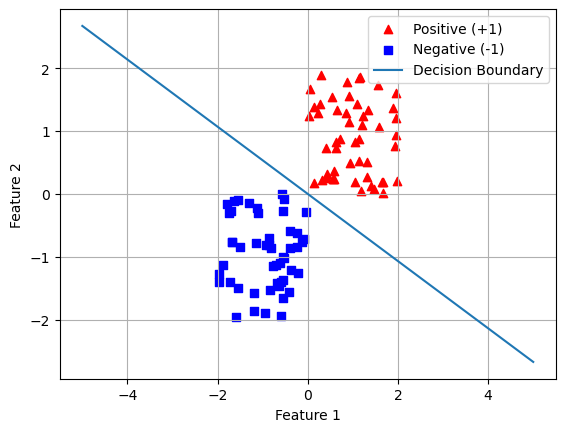

In [38]:
np.random.seed(0)
X1 = np.random.uniform(low=-1,high=1,size=(points,dim)) + [1, 1]  # 第一类数据点
X2 = np.random.uniform(low=-1,high=1,size=(points,dim)) - [1, 1]  # 第二类数据点
X = np.vstack((X1, X2))

# 生成标签
y1 = np.ones(points)
y2 = -np.ones(points)
y = np.hstack((y1, y2))

# 可视化数据（可选）
plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='^', label='Positive (+1)')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', marker='s', label='Negative (-1)')

x_values = np.linspace(-5, 5, 100)
y_values = (-w[0]*x_values-b)*(1/w[1])
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()